In [2]:
import pandas as pd
import numpy as np
import json
import ast



# Visalization
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
credits = pd.read_csv(r'..\data\the-movies-dataset\credits.csv')
credits.head(1)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862


In [5]:
# for gender value fixing
dfnu = pd.read_csv(r'..\data\the-movies-dataset\ready_dfs\dfnu.csv')
gender = lambda x: "Female" if x == 1 else ("Male" if x == 2 else x)

def name_search (df):
    in_dfnu = 0
    out_dfnu = 0
    for e in df.index:
        name = df.loc[e, 'name'].split(' ')[0]
        if name in dfnu.name:
            in_dfnu = in_dfnu + 1
        else:
            out_dfnu = out_dfnu + 1
    print (f"Names in dfnu: {in_dfnu}\nNames not in dfnu: {out_dfnu}")

print("Done")

Done


In [64]:
dfnu.shape

(240698, 3)

In [65]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
cast    45476 non-null object
crew    45476 non-null object
id      45476 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [66]:
credits.isnull().any()

cast    False
crew    False
id      False
dtype: bool

In [67]:
credits = credits.set_index('id')

In [68]:
cast = pd.DataFrame(credits['cast'])
crew = pd.DataFrame(credits['crew'])

## Cast

In [69]:
cast.iloc[0,0]

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

In [70]:
cast.shape

(45476, 1)

In [71]:
cast['cast'] = cast['cast'].apply(ast.literal_eval)
cast['cast_size'] = cast['cast'].apply(lambda x: len(x))
cast['cast_order'] = cast['cast'].apply(lambda x: [i['order'] for i in x] if isinstance(x, list) else [])
cast['cast_name'] = cast['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
cast['cast_gender'] = cast['cast'].apply(lambda x: [i['gender'] for i in x] if isinstance(x, list) else [])

In [72]:
cast.head(2)

,cast,cast_size,cast_order,cast_name,cast_gender
id,,,,,
862,"[{'cast_id': 14, 'character': 'Woody (voice)',...",13,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2]"
8844,"[{'cast_id': 1, 'character': 'Alan Parrish', '...",26,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[2, 2, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0, ..."


In [73]:
cast.shape

(45476, 5)

In [74]:
credits_order = []
actors_name = []
actors_gender = []
actors = {'credits_order': credits_order, 'name': actors_name, 'gender': actors_gender}
for e in range(45476):
    for i in cast.iloc[e, 2]:
        credits_order.append(i)
    for i in cast.iloc[e, 3]:
        actors_name.append(i)
    for i in cast.iloc[e, 4]:
        actors_gender.append(i)
actors = pd.DataFrame(actors)
print("Done")

Done


In [75]:
actors.shape

(562474, 3)

In [76]:
actors['name'].value_counts().head(10)

Bess Flowers         241
Christopher Lee      148
John Wayne           125
Samuel L. Jackson    123
Michael Caine        110
Gérard Depardieu     110
John Carradine       109
Donald Sutherland    109
Jackie Chan          108
Frank Welker         107
Name: name, dtype: int64

The 10 most prolific actors in this dataset. It must be noted that most of the entries correspond with classic actors; therefore it is difficult to try to establish some kind of popularity measure, as most of these actors are dead.

In [77]:
genders = actors.gender.value_counts()
genders

2    226713
0    223964
1    111797
Name: gender, dtype: int64

In [78]:
actors.gender = actors.gender.apply(gender)

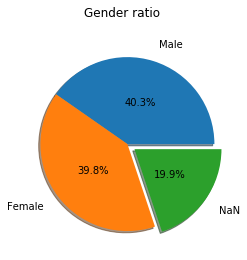

In [79]:
labels = 'Male', 'Female', 'NaN'
explode = 0, 0, 0.1

plt.pie(genders,  autopct='%1.1f%%', startangle=0, explode= explode, labels= labels, shadow= True, pctdistance = 0.5, labeldistance = 1.2)
plt.suptitle('Gender ratio', fontsize=12)

plt.show()

In order to resolve the NaN problem, it was thought that a solution involving the gender asotiation around names was a quick and easy one. As any names has a certain gender assigned to it. For that pourpose a function was developed (gender_search) and a new df created: dfnu (DataFrame Names Unique).

Sadly, it has been realised that a large portion of the NaN values correspond with "foreing" actors and actresses. Foreign not in the sense of nationality, but language, as is understood in the "metadata" csv.

Knowing that dfnu contains a majority of english names of both genders (as it originates from the scottish National Records), it will be used to determine the number of english and none-english names.

In [80]:
name_search(actors)

Names in dfnu: 0
Names not in dfnu: 562474


In [81]:
genders = actors.gender.value_counts()
genders

Male      226713
0         223964
Female    111797
Name: gender, dtype: int64

In [82]:
top_5_actors = actors.groupby('credits_order')['gender'].value_counts().head(10)
top_5_actors_2 = actors.groupby('credits_order')['gender'].count().head(5)

print(f"Top 5 billing actors:\n{top_5_actors}\n\nTotal sum for billing level:\n{top_5_actors_2}")

Top 5 billing actors:
credits_order  gender
0              Male      21322
               Female     8389
               0          7036
1              Male      17945
               Female    13061
               0         10583
2              Male      17823
               0         11434
               Female    11167
3              Male      17121
Name: gender, dtype: int64

Total sum for billing level:
credits_order
0    36747
1    41589
2    40424
3    39300
4    37196
Name: gender, dtype: int64


## Credits

In [83]:
# crew.iloc[0,0]
# If scrpit already initialized use:
# crew.iloc[0,1]

In [84]:
# Lambdas for data extraction. The return data is introduced into a list in order to better operate with it in the future. They cover the director, producer and writer roles. Though many more remain unexplored.

director_name = lambda x: [i['name']for i in x if i['department'] == 'Directing']
director_gender = lambda x: [i['gender']for i in x if i['department'] == 'Directing']

producer_name = lambda x: [i['name']for i in x if i['department'] == 'Production']
producer_gender = lambda x: [i['gender']for i in x if i['department'] == 'Production']

writer_name = lambda x: [i['name']for i in x if i['department'] == 'Writing']
writer_gender = lambda x: [i['gender']for i in x if i['department'] == 'Writing']

In [85]:
crew['crew'] = crew['crew'].apply(ast.literal_eval)
crew['crew_len'] = crew['crew'].apply(lambda x: len(x))

# director data
crew['director'] = crew['crew'].apply(director_name)
crew['director_gender'] = crew['crew'].apply(director_gender)

# producer data
crew['producer'] = crew['crew'].apply(producer_name)
crew['producer_gender'] = crew['crew'].apply(producer_gender)

# writer data
crew['writer'] = crew['crew'].apply(writer_name)
crew['wirter_gender'] = crew['crew'].apply(writer_gender)

In [86]:
crew

,crew,crew_len,director,director_gender,producer,producer_gender,writer,wirter_gender
id,,,,,,,,
862,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",106,"[John Lasseter, Roman Figun, Desirée Mourad]","[2, 0, 0]","[Bonnie Arnold, Ed Catmull, Ralph Guggenheim, ...","[1, 0, 2, 2, 0, 0, 0, 1, 0]","[Joss Whedon, Andrew Stanton, Joel Cohen, Alec...","[2, 2, 2, 0, 2, 2, 0, 2]"
8844,"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",16,[Joe Johnston],[2],"[Larry J. Franco, Nancy Foy, Scott Kroopf, Ted...","[2, 0, 2, 2, 2, 2]","[Jonathan Hensleigh, Chris van Allsburg, Greg ...","[2, 2, 2, 2]"
15602,"[{'credit_id': '52fe466a9251416c75077a89', 'de...",4,[Howard Deutch],[2],[],[],"[Mark Steven Johnson, Mark Steven Johnson]","[2, 2]"
31357,"[{'credit_id': '52fe44779251416c91011acb', 'de...",10,[Forest Whitaker],[2],"[Ronald Bass, Ezra Swerdlow, Deborah Schindler...","[0, 2, 1, 0, 0]","[Ronald Bass, Terry McMillan, Terry McMillan]","[0, 0, 0]"
11862,"[{'credit_id': '52fe44959251416c75039ed7', 'de...",7,[Charles Shyer],[2],[Nancy Meyers],[1],"[Nancy Meyers, Albert Hackett]","[1, 2]"
...,...,...,...,...,...,...,...,...
439050,"[{'credit_id': '5894a97d925141426c00818c', 'de...",9,[Hamid Nematollah],[0],[Hamid Nematollah],[0],[],[]
111109,"[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",6,[Lav Diaz],[0],[],[],[Lav Diaz],[0]
67758,"[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",5,[Mark L. Lester],[2],[],[],"[C. Courtney Joyner, Jeffrey Goldenberg]","[2, 2]"


In [87]:
crew = crew.reset_index()

In [88]:
crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 9 columns):
id                 45476 non-null int64
crew               45476 non-null object
crew_len           45476 non-null int64
director           45476 non-null object
director_gender    45476 non-null object
producer           45476 non-null object
producer_gender    45476 non-null object
writer             45476 non-null object
wirter_gender      45476 non-null object
dtypes: int64(2), object(7)
memory usage: 3.1+ MB


In [89]:
crew.id = crew.id.astype(str)
crew.id.dtype

dtype('O')

In [90]:
crew.head(6)

,id,crew,crew_len,director,director_gender,producer,producer_gender,writer,wirter_gender
0,862,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",106,"[John Lasseter, Roman Figun, Desirée Mourad]","[2, 0, 0]","[Bonnie Arnold, Ed Catmull, Ralph Guggenheim, ...","[1, 0, 2, 2, 0, 0, 0, 1, 0]","[Joss Whedon, Andrew Stanton, Joel Cohen, Alec...","[2, 2, 2, 0, 2, 2, 0, 2]"
1,8844,"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",16,[Joe Johnston],[2],"[Larry J. Franco, Nancy Foy, Scott Kroopf, Ted...","[2, 0, 2, 2, 2, 2]","[Jonathan Hensleigh, Chris van Allsburg, Greg ...","[2, 2, 2, 2]"
2,15602,"[{'credit_id': '52fe466a9251416c75077a89', 'de...",4,[Howard Deutch],[2],[],[],"[Mark Steven Johnson, Mark Steven Johnson]","[2, 2]"
3,31357,"[{'credit_id': '52fe44779251416c91011acb', 'de...",10,[Forest Whitaker],[2],"[Ronald Bass, Ezra Swerdlow, Deborah Schindler...","[0, 2, 1, 0, 0]","[Ronald Bass, Terry McMillan, Terry McMillan]","[0, 0, 0]"
4,11862,"[{'credit_id': '52fe44959251416c75039ed7', 'de...",7,[Charles Shyer],[2],[Nancy Meyers],[1],"[Nancy Meyers, Albert Hackett]","[1, 2]"
5,949,"[{'credit_id': '52fe4292c3a36847f802916d', 'de...",71,"[Michael Mann, Cate Hardman, Michael Waxman]","[2, 1, 0]","[Art Linson, Michael Mann, Bonnie Timmermann, ...","[2, 2, 1, 0, 2, 0, 2, 0, 0]",[Michael Mann],[2]


In [91]:
movie_id = []
directors_name = []
directors_gender = []
directors = {'movie_id': movie_id, 'name': directors_name, 'gender': directors_gender}
for e in range(45476):
    for i in crew.iloc[e, 3]:
        idm = crew.iloc[e, 0]
        movie_id.append(idm)
        directors_name.append(i)
    for i in crew.iloc[e, 4]:
        directors_gender.append(i)
directors = pd.DataFrame(directors)
print("Done")

Done


In [92]:
directors.head(6)

,movie_id,name,gender
0,862,John Lasseter,2
1,862,Roman Figun,0
2,862,Desirée Mourad,0
3,8844,Joe Johnston,2
4,15602,Howard Deutch,2
5,31357,Forest Whitaker,2


In [93]:
movie_id = []
producers_name = []
producers_gender = []
producers = {'movie_id': movie_id, 'name': producers_name, 'gender': producers_gender}
for e in range(45476):
    for i in crew.iloc[e, 5]:
        idm = crew.iloc[e, 0]
        movie_id.append(idm)
        producers_name.append(i)
    for i in crew.iloc[e, 6]:
        producers_gender.append(i)
producers = pd.DataFrame(producers)
print("Done")

Done


In [94]:
producers.head(6)

,movie_id,name,gender
0,862,Bonnie Arnold,1
1,862,Ed Catmull,0
2,862,Ralph Guggenheim,2
3,862,Steve Jobs,2
4,862,Karen Robert Jackson,0
5,862,Lori Lombardo,0


In [95]:
pro_gend_count = producers.gender.value_counts()
dir_gend_count = directors.gender.value_counts()
print(f'Directors:\n{dir_gend_count}\n\nProducers:\n{pro_gend_count}')

Directors:
2    28704
0    26234
1     3196
Name: gender, dtype: int64

Producers:
0    47845
2    34207
1    12446
Name: gender, dtype: int64


The number of NaN values is much higher than expected. NaN values have been observed in both genders. In order to continue with the clean-up process, the "name_search" fucntion is deployed.

In [96]:
print ("Producer's df")
name_search(producers)
print ("\nDirector's df")
name_search(directors)

Producer's df
Names in dfnu: 0
Names not in dfnu: 94498

Director's df
Names in dfnu: 0
Names not in dfnu: 58134
